In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
raw = pd.read_csv("PCA-KC Data-Assignment.csv").drop("Unnamed: 0", axis=1)
df = pd.read_csv("data\PCA X Data2.csv").drop("Unnamed: 0", axis=1)
df

,total crime,violent crime,property crime,Median income,Median home value,Population with BS or More,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Number of Households,Walk Score,Transit Score,Bike Score,Trash / Recycling
0,456,848,358,56044,156425,434,1513,298,41,93,63,327,938,15,15.0,25,12.040000
1,431,980,332,27803,62380,34,143,358,10,301,121,155,328,47,35.0,33,33.345070
2,392,91,687,71767,266200,595,1339,111,12,127,47,276,701,31,26.0,28,5.770115
3,390,1105,262,37498,58311,91,90,717,4,32,125,196,365,50,43.0,36,38.679842
4,385,304,401,39375,28200,86,39,652,0,0,43,279,349,6,31.0,30,16.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,89,31,60,82241,183371,421,1143,85,2,118,30,71,506,12,18.0,29,18.304348
187,70,65,240,49849,99100,147,582,525,4,85,79,287,570,19,36.0,19,52.408163
188,54,76,127,56404,139900,209,615,62,6,71,156,286,419,33,27.0,23,20.893617
189,122,277,83,50958,210200,379,525,148,9,278,87,376,542,68,54.0,49,14.084507


In [109]:
wPC1 = np.array([-.658, -.626, -.538, .831, .726, .842, .850, -.614, .394, 0, .542, -.039, .526, -.109, -.345, -.071, -.522])
wPC2 = np.array([-.061, .041, -.185, -.057, .224, .324, .007, .024, .278, 0, .426, .565, .27, .853, .805, .857, .116])

In [104]:
wPC1.shape
wPC2.shape

(17,)

In [110]:
scoresA = []
scoresB = []
for i in range(191):
    row = df.iloc[i]
    scoresA.append(np.matmul(wPC1, row))
    scoresB.append(np.matmul(wPC2, row))

scores = pd.DataFrame()
scores["PC1 Scores"] = scoresA
scores["PC2 Scores"] = scoresB
scores

,PC1 Scores,PC2 Scores
0,161098.185120,32467.715640
1,67445.902873,12692.303028
2,254156.870000,56036.228333
3,72328.842123,11320.900862
4,52413.463500,4358.913000
...,...,...
186,202894.514130,36760.327304
187,113741.196939,19793.674347
188,149219.054532,28587.270660
189,195611.716887,44842.221803


In [142]:
scores = pd.concat([df, scores], axis=1)
scores["Neighborhood"] = raw["NBH_NAME"]
scored_NBH = scores.loc[:, "PC1 Scores": "Neighborhood"]
scored_NBH.sort_values(by="PC2 Scores", inplace=True, ascending=False)
scored_NBH

,PC1 Scores,PC2 Scores,Neighborhood
89,830577.856857,205534.354476,Parkdale And Walden
164,682799.934000,146593.791556,Oak Park Northwest
183,429401.781000,115546.401333,Hill Haven
148,543637.701647,110889.632412,Oak Park Southeast
146,493480.054786,101456.101714,Country Club
...,...,...,...
13,50074.350712,6415.206842,Knoches Park
18,49213.285180,5827.444738,Oak Park Southwest
4,52413.463500,4358.913000,Vineyard Estates
170,36103.683171,4031.394629,Colonial Square


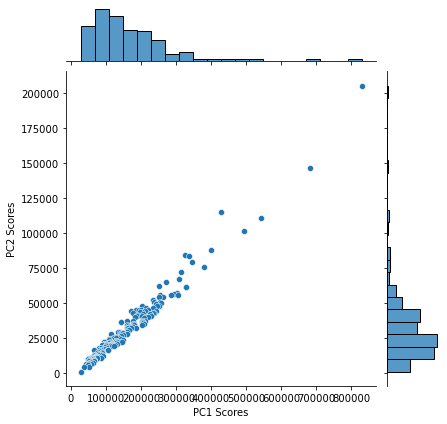

In [143]:
sns.jointplot(x="PC1 Scores", y="PC2 Scores", data=scored_NBH)
plt.show()